In [1]:
cd ..

/home/janek/reasonable-embeddings


In [2]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics

from src.reasoner_mod import *
from src.generate import load_dataset
from src.reasoner import *
from src.utils import *
from src.vis import *

In [3]:
seed = 2022
dataset_path = 'local/out/dataset/sub-100.json'
ts = timestr()
train_onto, test_onto, data_tr, data_vl, data_te = load_dataset(dataset_path)

emb_size = 10
hidden_size = 16
epoch_count = 15
test_epoch_count = 10
batch_size = 32

T.manual_seed(seed)

trained_reasoner = ModifiedReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
encoders = [ModifiedEmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in train_onto]

In [4]:
not_nn = trained_reasoner.not_nn
optimizer = T.optim.AdamW(not_nn.parameters(), 0.0001)

for i in range(100000):
    optimizer.zero_grad()
    input1 = T.rand(10)
    loss = (F.mse_loss(input1, not_nn(not_nn(input1))))
    if i%10000==0:
        print("loss: ", loss)
    loss.backward()
    optimizer.step()

trained_reasoner.not_nn = not_nn

loss:  tensor(0.4560, grad_fn=<MseLossBackward0>)
loss:  tensor(0.0288, grad_fn=<MseLossBackward0>)
loss:  tensor(0.0043, grad_fn=<MseLossBackward0>)
loss:  tensor(0.0041, grad_fn=<MseLossBackward0>)
loss:  tensor(1.8699e-07, grad_fn=<MseLossBackward0>)
loss:  tensor(1.9603e-10, grad_fn=<MseLossBackward0>)
loss:  tensor(7.1681e-11, grad_fn=<MseLossBackward0>)
loss:  tensor(1.2107e-10, grad_fn=<MseLossBackward0>)
loss:  tensor(1.0325e-10, grad_fn=<MseLossBackward0>)
loss:  tensor(6.8281e-09, grad_fn=<MseLossBackward0>)


In [5]:
and_nn = trained_reasoner.and_nn
optimizer = T.optim.AdamW(and_nn.parameters(), 0.0001)

for i in range(100000):
    optimizer.zero_grad()
    input1 = T.rand(10)
    input2 = T.rand(10)
    input3 = T.rand(10)
    loss = (F.mse_loss(input1, and_nn(im_mod(input1, input1))))
    if i%10000==0:
        print("loss: ", loss)
    loss.backward()
    optimizer.step()

trained_reasoner.and_nn = and_nn

loss:  tensor(0.5054, grad_fn=<MseLossBackward0>)
loss:  tensor(0.0020, grad_fn=<MseLossBackward0>)
loss:  tensor(0.0005, grad_fn=<MseLossBackward0>)
loss:  tensor(0.0008, grad_fn=<MseLossBackward0>)
loss:  tensor(0.0003, grad_fn=<MseLossBackward0>)
loss:  tensor(0.0006, grad_fn=<MseLossBackward0>)
loss:  tensor(0.0001, grad_fn=<MseLossBackward0>)
loss:  tensor(5.7226e-05, grad_fn=<MseLossBackward0>)
loss:  tensor(1.9437e-05, grad_fn=<MseLossBackward0>)
loss:  tensor(1.0347e-05, grad_fn=<MseLossBackward0>)


In [6]:
input1 = T.rand(10)
print(input1)
print(and_nn(im_mod(input1, input1)))
F.mse_loss(input1, and_nn(im_mod(input1, input1)))

tensor([0.9285, 0.0132, 0.9775, 0.7875, 0.7288, 0.2197, 0.6333, 0.5863, 0.5053,
        0.4840])
tensor([0.9290, 0.0107, 0.9769, 0.7866, 0.7294, 0.2197, 0.6363, 0.5883, 0.5049,
        0.4844], grad_fn=<AddBackward0>)


tensor(2.1266e-06, grad_fn=<MseLossBackward0>)

In [7]:
# seed = 2022
# dataset_path = 'local/out/dataset/sub-100.json'
# ts = timestr()
# train_onto, test_onto, data_tr, data_vl, data_te = load_dataset(dataset_path)

# emb_size = 10
# hidden_size = 16
# epoch_count = 15
# test_epoch_count = 10
# batch_size = 32

# T.manual_seed(seed)

# trained_reasoner = ModifiedReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
# encoders = [ModifiedEmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in train_onto]

train_logger = train_mod(data_tr, data_vl, trained_reasoner, encoders, epoch_count=epoch_count, batch_size=batch_size, not_nn_loss_weight=120, and_nn_loss_weight=250)

train epoch 00/15 | batch 2001/2000 | loss 0.9194 | val loss 0.7792 | acc 0.2131 | f1 0.3514 | prec 0.2131 | recall 1.0000 | roc auc 0.4557 | pr auc 0.2227 | elapsed 31.70s
train epoch 01/15 | batch 2001/2000 | loss 5.8482 | val loss 0.8583 | acc 0.8204 | f1 0.2816 | prec 0.9559 | recall 0.1651 | roc auc 0.6399 | pr auc 0.4707 | elapsed 77.11s
train epoch 02/15 | batch 2001/2000 | loss 8.7956 | val loss 0.8082 | acc 0.8448 | f1 0.4887 | prec 0.8198 | recall 0.3481 | roc auc 0.8024 | pr auc 0.6487 | elapsed 80.15s
train epoch 03/15 | batch 2001/2000 | loss 8.9494 | val loss 0.7261 | acc 0.8780 | f1 0.6424 | prec 0.8560 | recall 0.5141 | roc auc 0.8623 | pr auc 0.7592 | elapsed 81.39s
train epoch 04/15 | batch 2001/2000 | loss 8.3783 | val loss 0.6509 | acc 0.9026 | f1 0.7339 | prec 0.8786 | recall 0.6302 | roc auc 0.8932 | pr auc 0.8196 | elapsed 82.72s
train epoch 05/15 | batch 2001/2000 | loss 7.7455 | val loss 0.5971 | acc 0.9166 | f1 0.7775 | prec 0.9014 | recall 0.6836 | roc auc 0.

In [8]:
input = T.rand(10)
print(input)
output = trained_reasoner.not_nn(trained_reasoner.not_nn(input))
print(output)
print(F.mse_loss(input, output))

tensor([0.9317, 0.2324, 0.2104, 0.3930, 0.1047, 0.8437, 0.8725, 0.6680, 0.5191,
        0.7318])
tensor([0.9314, 0.2305, 0.2120, 0.3937, 0.1034, 0.8431, 0.8744, 0.6696, 0.5169,
        0.7336], grad_fn=<SqueezeBackward3>)
tensor(2.2536e-06, grad_fn=<MseLossBackward0>)


In [9]:
print(input)
print(trained_reasoner.and_nn(im_mod( input, input)))
F.mse_loss(input, trained_reasoner.and_nn(im_mod(input, input)))

tensor([0.9317, 0.2324, 0.2104, 0.3930, 0.1047, 0.8437, 0.8725, 0.6680, 0.5191,
        0.7318])
tensor([0.9064, 0.3581, 0.4264, 0.2211, 0.2836, 0.9415, 0.9556, 0.7704, 0.4405,
        0.5336], grad_fn=<AddBackward0>)


tensor(0.0197, grad_fn=<MseLossBackward0>)

In [10]:
print(input)
print(trained_reasoner.bot_concept[0])
print(trained_reasoner.and_nn(im_mod(trained_reasoner.bot_concept[0], input)))
print(F.mse_loss(trained_reasoner.and_nn(im_mod(trained_reasoner.bot_concept[0], input)), trained_reasoner.bot_concept[0]))

tensor([0.9317, 0.2324, 0.2104, 0.3930, 0.1047, 0.8437, 0.8725, 0.6680, 0.5191,
        0.7318])
tensor([ 0.9211,  0.0685,  0.1347, -0.4839,  0.8599,  0.0113,  0.0466,  0.0292,
        -0.2751, -0.5990], grad_fn=<SelectBackward0>)
tensor([ 1.2852,  0.4802,  0.0068, -0.6325,  0.5609,  0.7951,  0.0932, -0.2980,
         0.7044, -0.3409], grad_fn=<AddBackward0>)
tensor(0.2180, grad_fn=<MseLossBackward0>)


In [11]:
print(input)
print(trained_reasoner.top_concept[0])
print(trained_reasoner.and_nn(im_mod(trained_reasoner.top_concept[0], input)))
print(F.mse_loss(trained_reasoner.and_nn(im_mod(trained_reasoner.top_concept[0], input)), input))


tensor([0.9317, 0.2324, 0.2104, 0.3930, 0.1047, 0.8437, 0.8725, 0.6680, 0.5191,
        0.7318])
tensor([ 0.1700, -0.5385, -0.2427,  0.4891,  0.4748,  0.7964,  1.0772, -0.0657,
        -0.2340,  0.3307], grad_fn=<SelectBackward0>)
tensor([0.0544, 0.1838, 0.5834, 0.7005, 0.1455, 1.7036, 0.9540, 0.7655, 0.1838,
        0.3823], grad_fn=<AddBackward0>)
tensor(0.1997, grad_fn=<MseLossBackward0>)


In [12]:
trained_reasoner.not_nn.weight

Parameter containing:
tensor([[-5.3517e-01,  3.4794e-01,  5.5907e-01, -1.9924e-01, -1.4805e-01,
          2.0051e-01, -9.5312e-02,  4.4502e-01,  4.2042e-02,  1.0448e-01],
        [ 4.3389e-01, -2.5344e-01,  1.9286e-01, -9.9881e-02,  3.1712e-01,
          7.3176e-01,  3.5330e-01,  2.6975e-01,  1.7032e-01, -1.6676e-01],
        [ 4.7268e-01,  2.5078e-01,  4.0047e-01,  3.1347e-01,  1.7651e-01,
         -5.6042e-01, -2.4915e-01,  2.1648e-01,  8.1260e-02,  5.1871e-02],
        [-6.0156e-02,  1.1461e-01,  4.9118e-01, -4.1060e-01,  6.3982e-01,
         -3.3926e-01,  7.6935e-02, -4.2776e-01,  2.1117e-01, -2.3742e-01],
        [-1.3930e-01,  3.4627e-01,  1.0240e-01,  4.9103e-01, -1.0124e-01,
          2.2414e-02,  5.0507e-01, -5.9493e-01,  2.0523e-01,  1.2662e-01],
        [ 2.3761e-01,  4.4777e-01, -3.8201e-01, -2.3669e-01,  1.4192e-01,
          9.8844e-02, -9.0020e-04,  1.5833e-02,  5.0444e-01, -9.0256e-03],
        [-7.7794e-02,  5.4810e-01, -1.8116e-01,  7.6189e-03,  4.8605e-01,
         -

In [13]:
print(T.round(T.matmul( trained_reasoner.not_nn.weight, trained_reasoner.not_nn.weight)*100)/100)

tensor([[1., -0., 0., -0., 0., -0., 0., 0., 0., -0.],
        [0., 1., -0., -0., 0., -0., 0., -0., 0., -0.],
        [0., 0., 1., 0., 0., 0., -0., -0., 0., -0.],
        [-0., -0., 0., 1., -0., 0., -0., 0., -0., -0.],
        [-0., -0., 0., -0., 1., -0., 0., 0., 0., -0.],
        [-0., -0., -0., 0., -0., 1., 0., 0., -0., -0.],
        [-0., 0., 0., 0., -0., 0., 1., 0., -0., 0.],
        [0., 0., 0., 0., -0., 0., -0., 1., -0., 0.],
        [-0., -0., -0., -0., -0., -0., 0., 0., 1., -0.],
        [0., 0., 0., 0., 0., 0., 0., -0., 0., 1.]], grad_fn=<DivBackward0>)


In [14]:
## --- TESTING
trained_test_encoders = {}
T.manual_seed(seed)
random_reasoner = ReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
test_logger = TrainingLogger(validate=True, metrics=batch_stats)

for reasoner_name, reasoner in [('trained reasoner', trained_reasoner), ('random reasoner', random_reasoner)]:
    print(reasoner_name)
    T.manual_seed(seed)
    trained_test_encoders[reasoner_name] = test_encoders = [EmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in test_onto]
    if reasoner_name == 'trained reasoner':
        train_mod(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger, not_nn_loss_weight=0.1)
    #else:
        #train(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger)

trained reasoner
train epoch 00/10 | batch 1251/1250 | loss 1.5859 | val loss 1.5856 | acc 0.5792 | f1 0.3875 | prec 0.2834 | recall 0.6124 | roc auc 0.6514 | pr auc 0.4822 | elapsed 23.73s
train epoch 01/10 | batch 1251/1250 | loss 1.3668 | val loss 1.1232 | acc 0.6871 | f1 0.4687 | prec 0.3715 | recall 0.6350 | roc auc 0.7344 | pr auc 0.5583 | elapsed 39.77s
train epoch 02/10 | batch 1251/1250 | loss 0.9818 | val loss 0.8179 | acc 0.7812 | f1 0.5709 | prec 0.4975 | recall 0.6696 | roc auc 0.8152 | pr auc 0.6605 | elapsed 40.38s
train epoch 03/10 | batch 1251/1250 | loss 0.7389 | val loss 0.6392 | acc 0.8512 | f1 0.6740 | prec 0.6434 | recall 0.7076 | roc auc 0.8773 | pr auc 0.7631 | elapsed 40.71s
train epoch 04/10 | batch 1251/1250 | loss 0.5985 | val loss 0.5364 | acc 0.8952 | f1 0.7559 | prec 0.7654 | recall 0.7466 | roc auc 0.9176 | pr auc 0.8395 | elapsed 40.30s
train epoch 05/10 | batch 1251/1250 | loss 0.5163 | val loss 0.4746 | acc 0.9216 | f1 0.8117 | prec 0.8494 | recall 0.

In [15]:
with T.no_grad():
    idx_te, X_te, y_te = data_te
    _, _, Y_te_good = eval_batch_mod(trained_reasoner, trained_test_encoders['trained reasoner'], X_te, y_te, idx_te)
   # _, _, Y_te_rand = eval_batch(random_reasoner, trained_test_encoders['random reasoner'], X_te, y_te, idx_te)

local/out/exp/20240627T114641


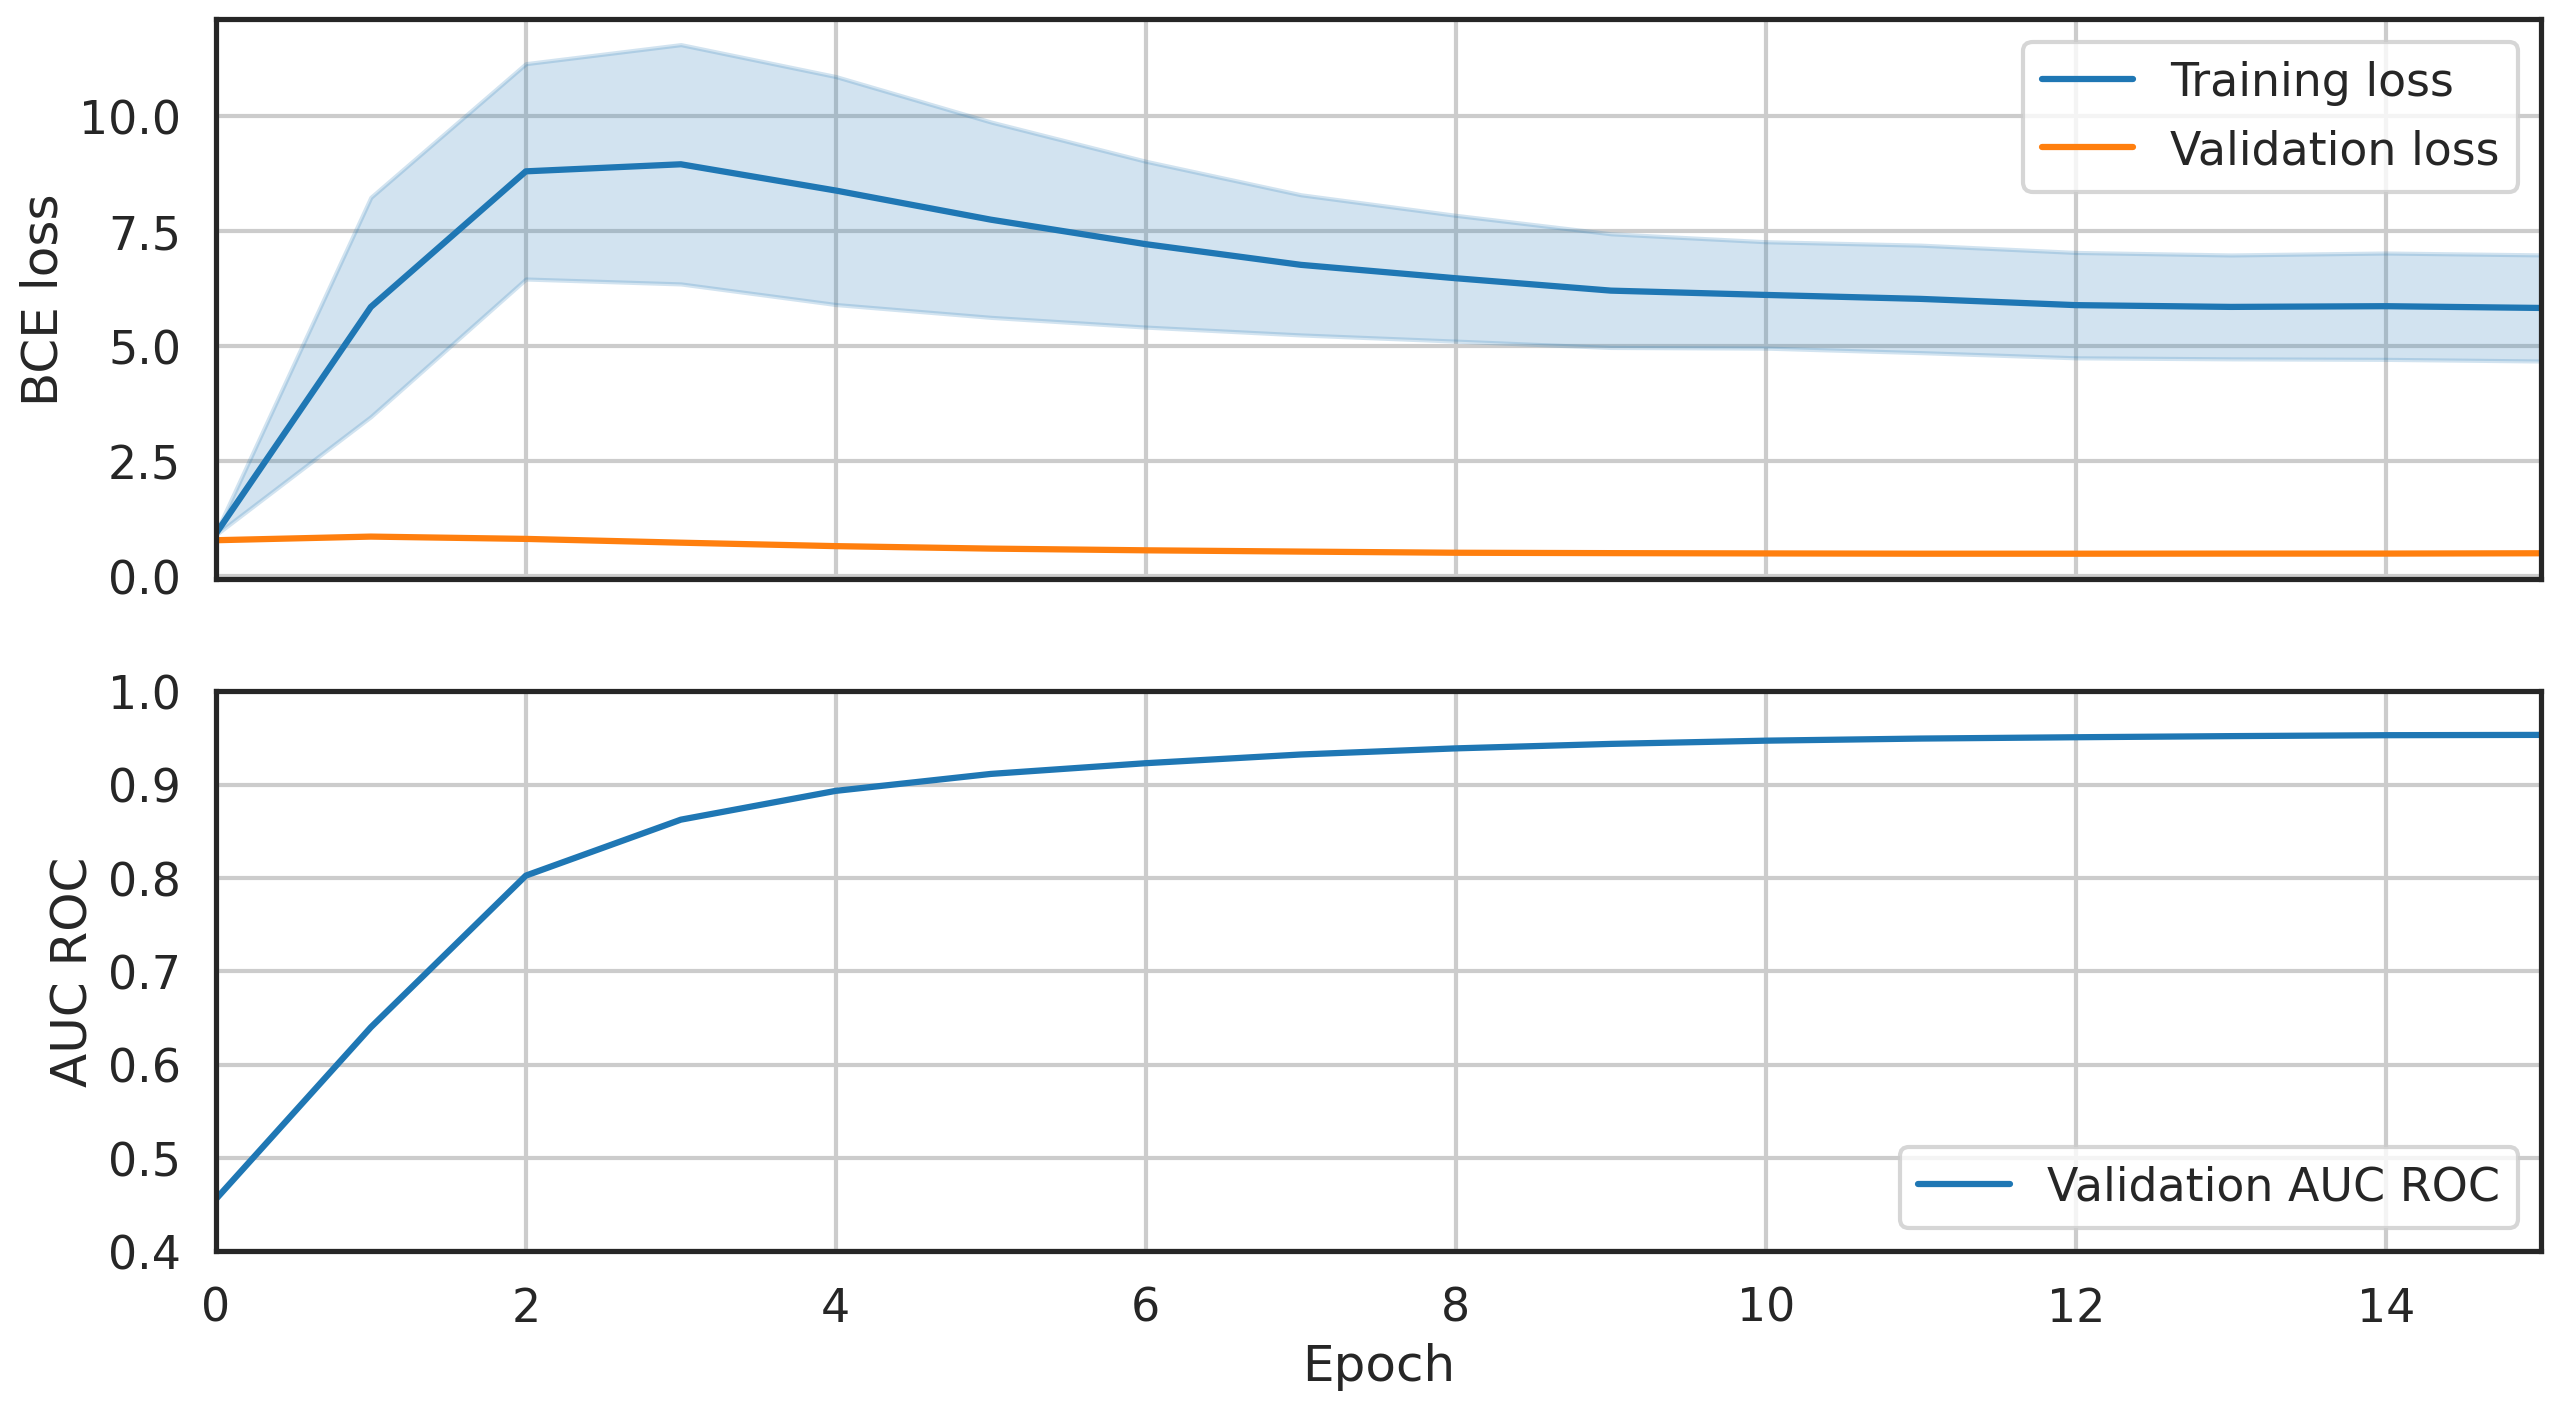

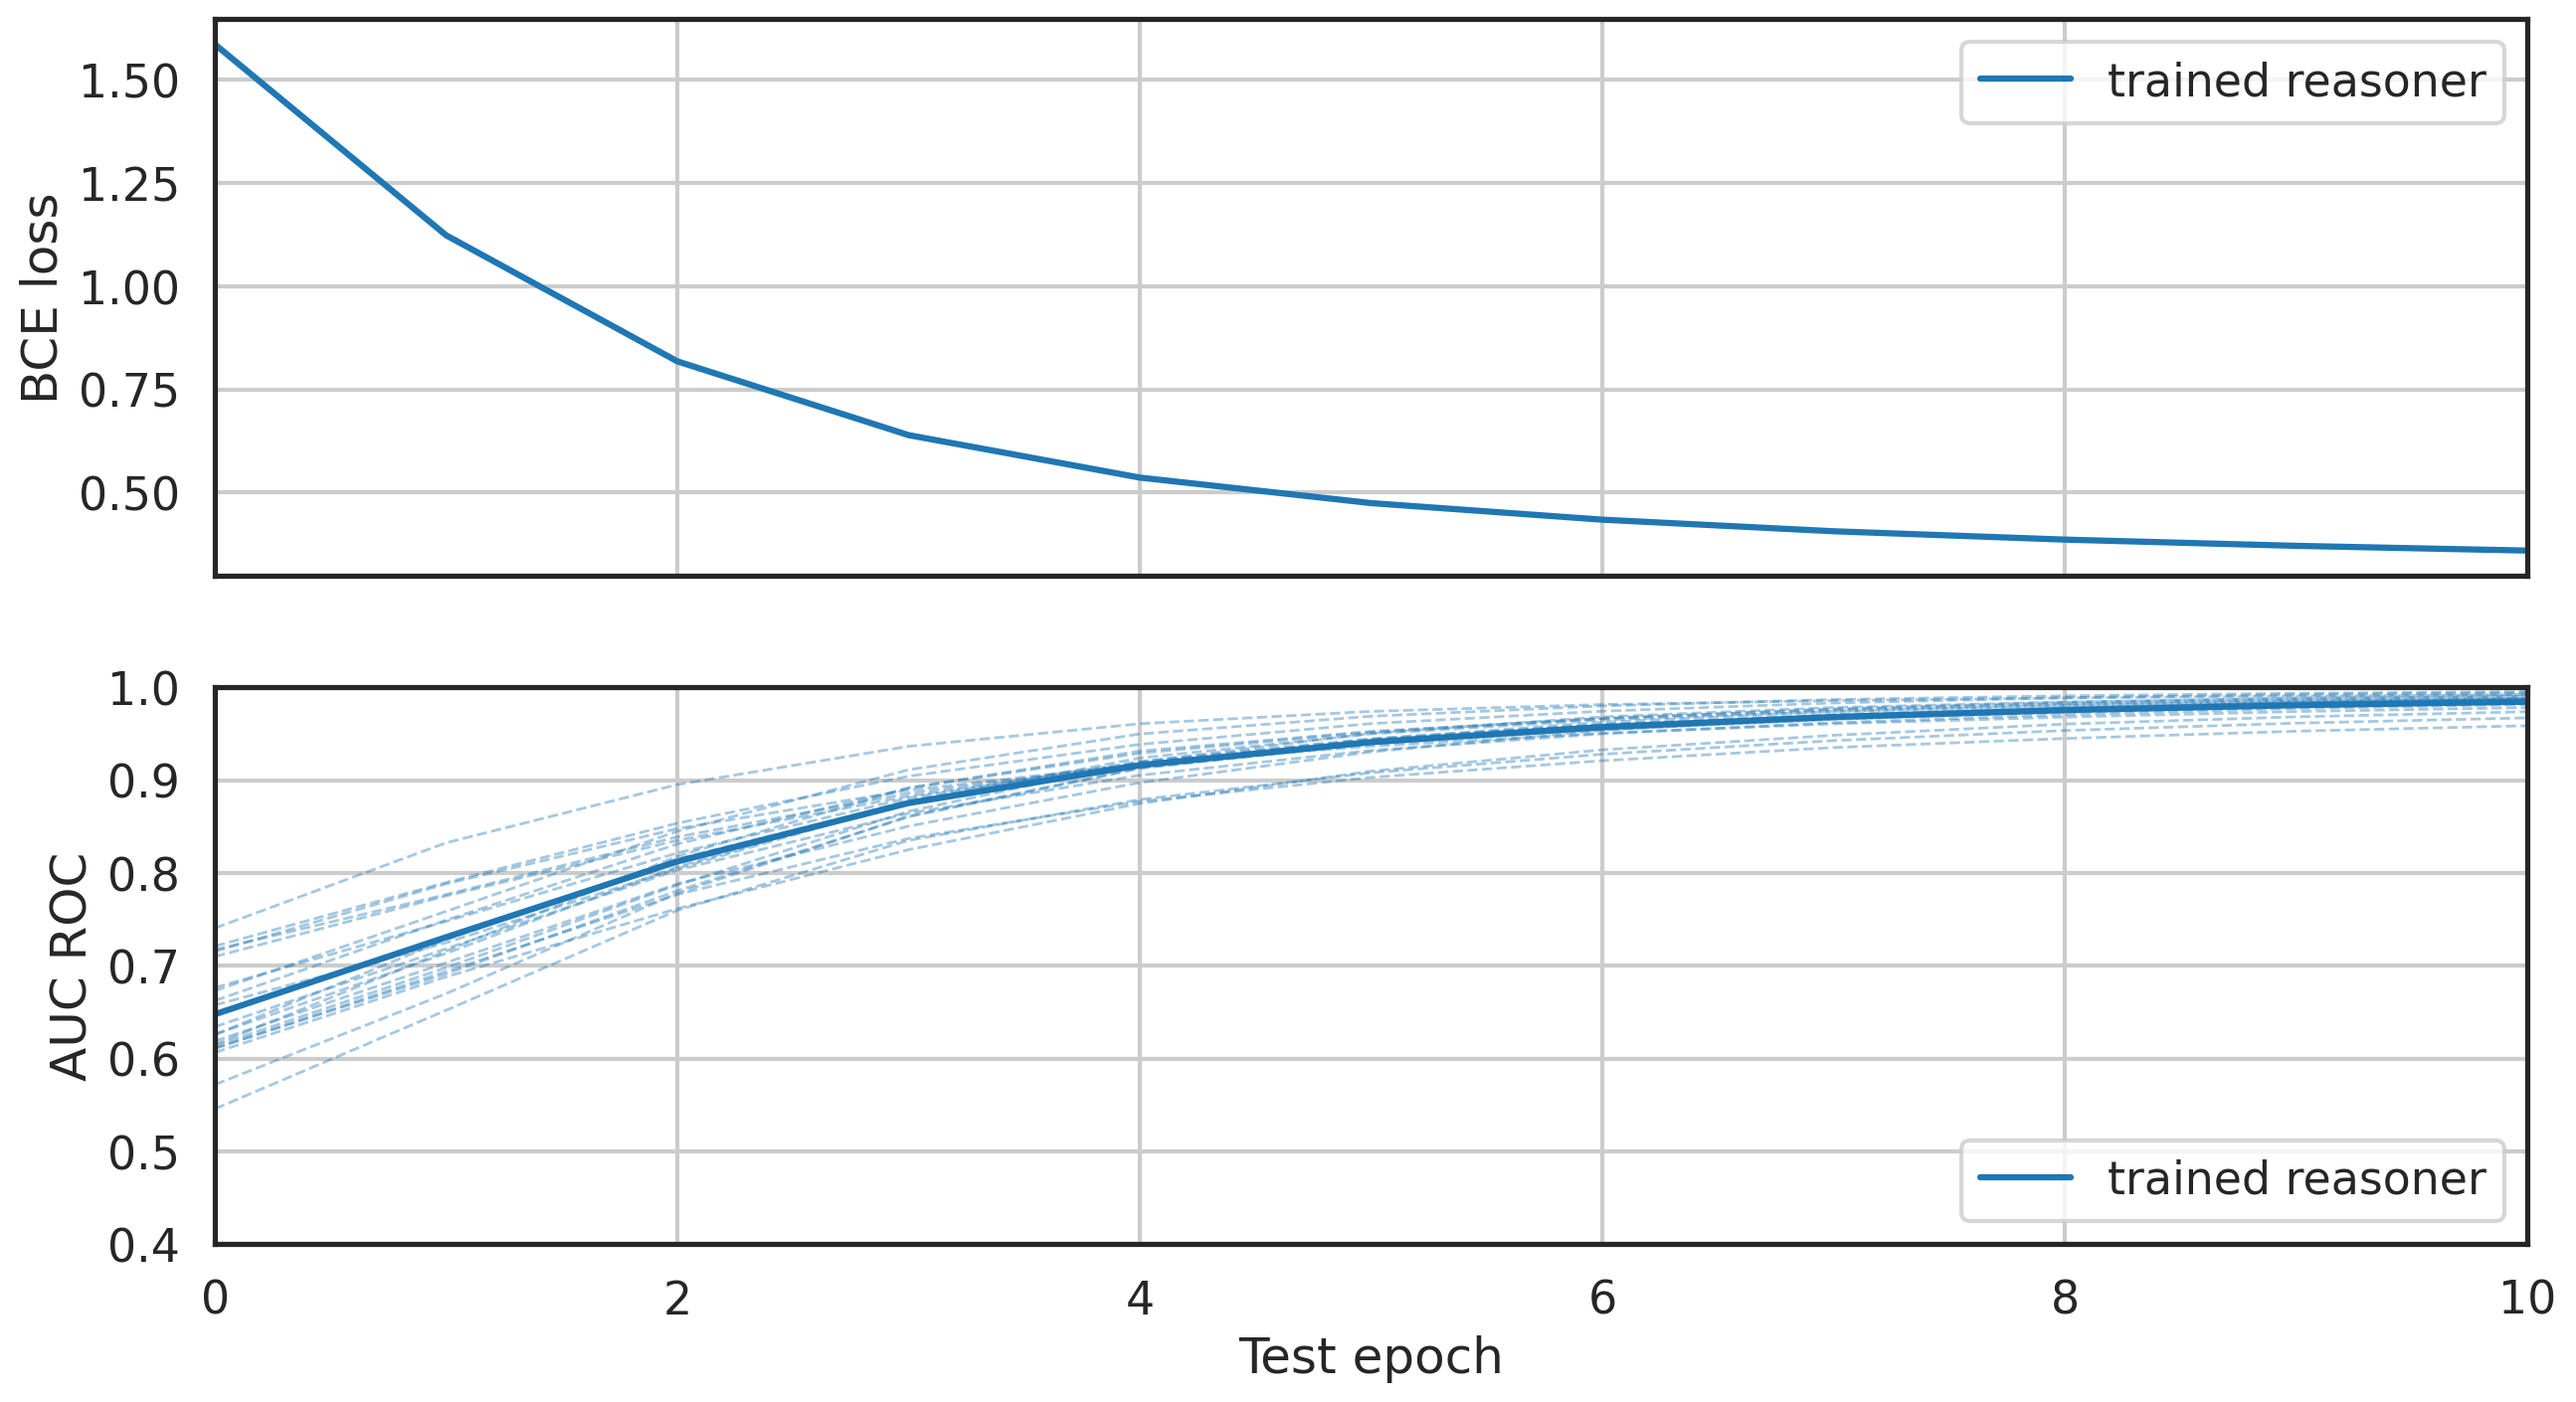

             mean       std     micro
acc      0.962325  0.014982  0.962325
prec     0.960192  0.026968  0.960892
recall   0.859982  0.047120  0.861776
f1       0.907103  0.037456  0.908639
auc_roc  0.984381  0.009141  0.985485
auc_pr   0.964622  0.019540  0.967252


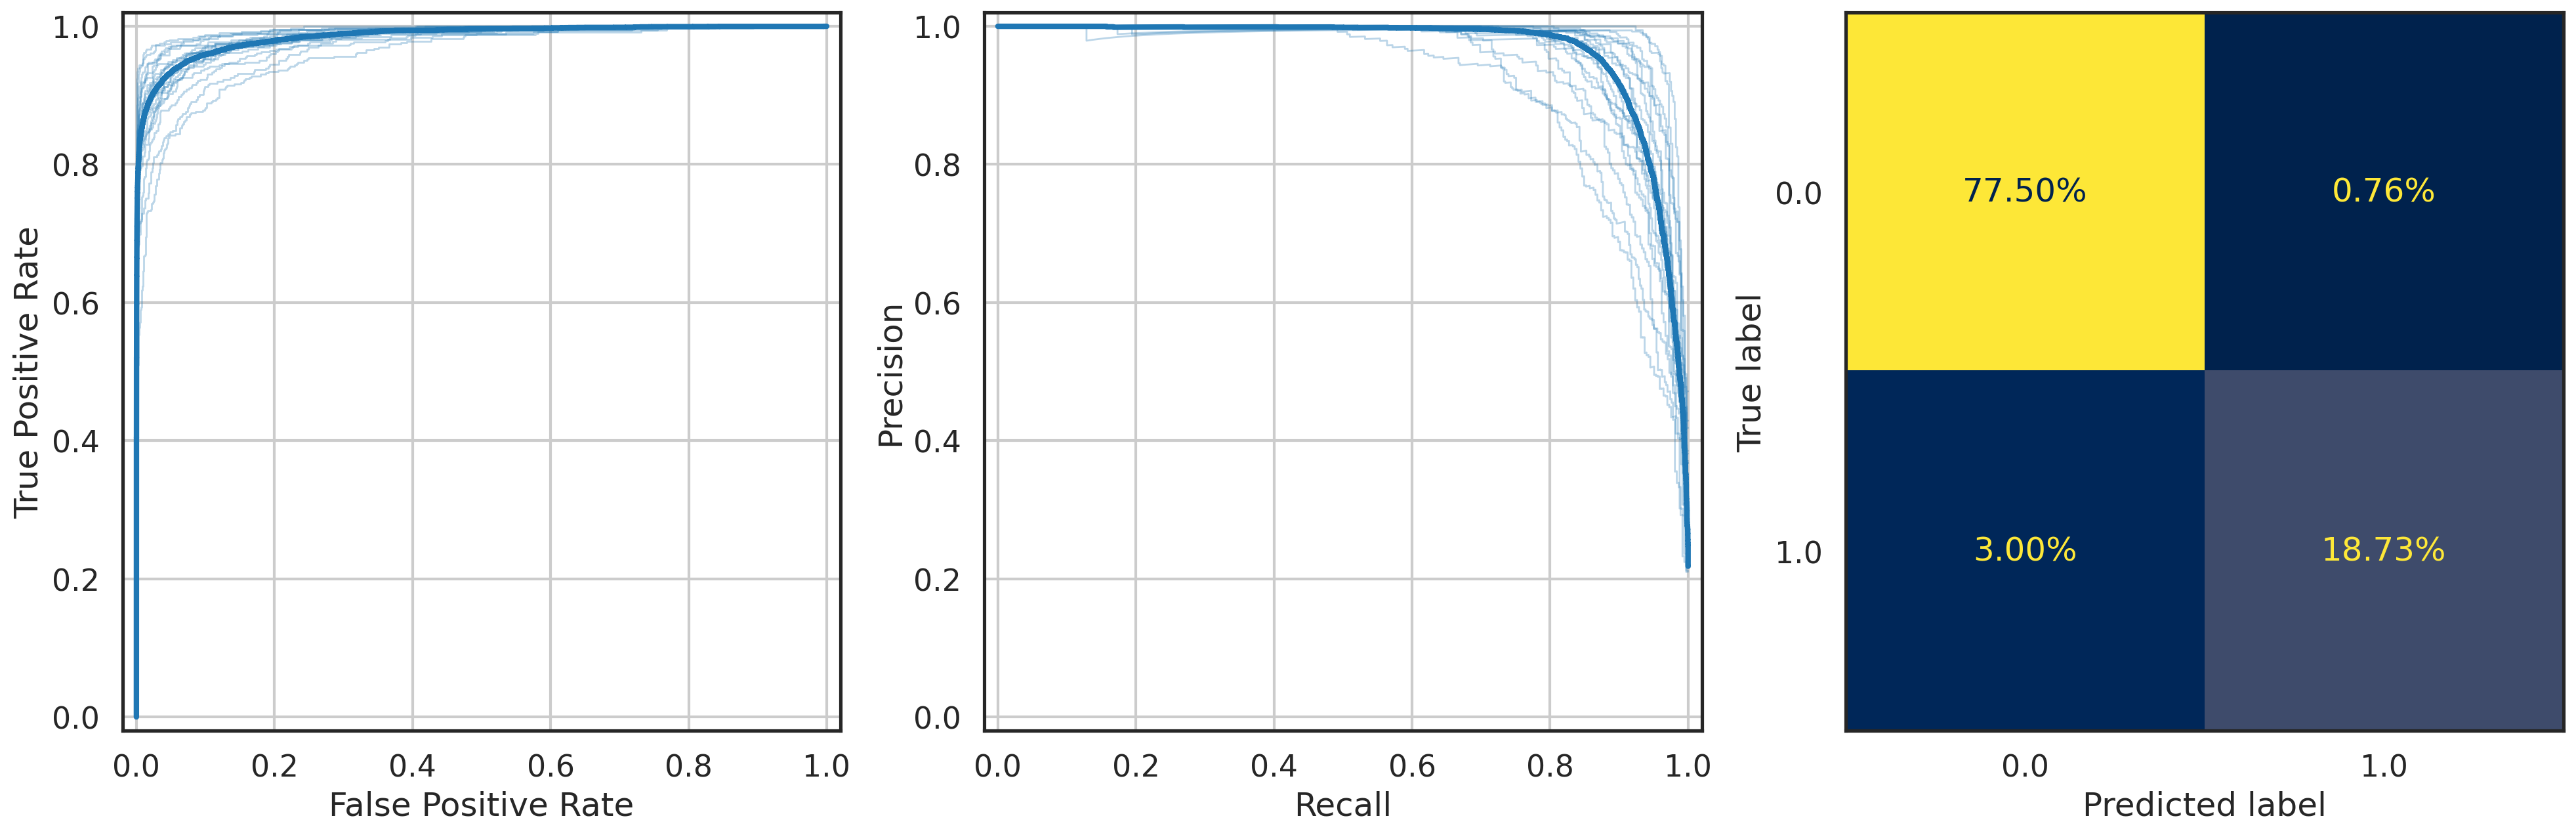

In [16]:
base = 'local/out/exp/' + ts
mkdirp(base)
print(base)

T.save(trained_reasoner.state_dict(), base+'/reasoner.pt')
df_tr = pd.DataFrame(train_logger.history_tr)
df_vl = pd.DataFrame(train_logger.history_vl)
df_tr.to_csv(base+'/train.csv', index=False)
df_vl.to_csv(base+'/valid.csv', index=False)
plot_train_history(df_tr, df_vl, save=base+'/train.png')

test_history_by_onto = pd.DataFrame(test_logger.history_vl_by_onto)
test_history = pd.DataFrame(test_logger.history_vl)
test_results = pd.DataFrame(dict(idx_te=idx_te, y_te=y_te, Y_te_good=Y_te_good))#, Y_te_rand=Y_te_rand))
test_history.to_csv(base+'/test.csv', index=False)
test_history_by_onto.to_csv(base+'/test-grouped.csv', index=False)
test_results.to_csv(base+'/test-results.csv', index=False)
plot_test_history(test_history, test_history_by_onto, save=base+'/test.png')
print(report(test_onto, y_te, np.array(Y_te_good), idx_te, save=base+'/%-trained'))
#print(report(test_onto, y_te, np.array(Y_te_rand), idx_te, save=base+'/%-random'))